# Programming Project 1 analysis using EDA tools
- Name: Ty
- Date: 10/3/2023
- Version: 1

### Import Modules

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset and save it to a dataframe named 'df'
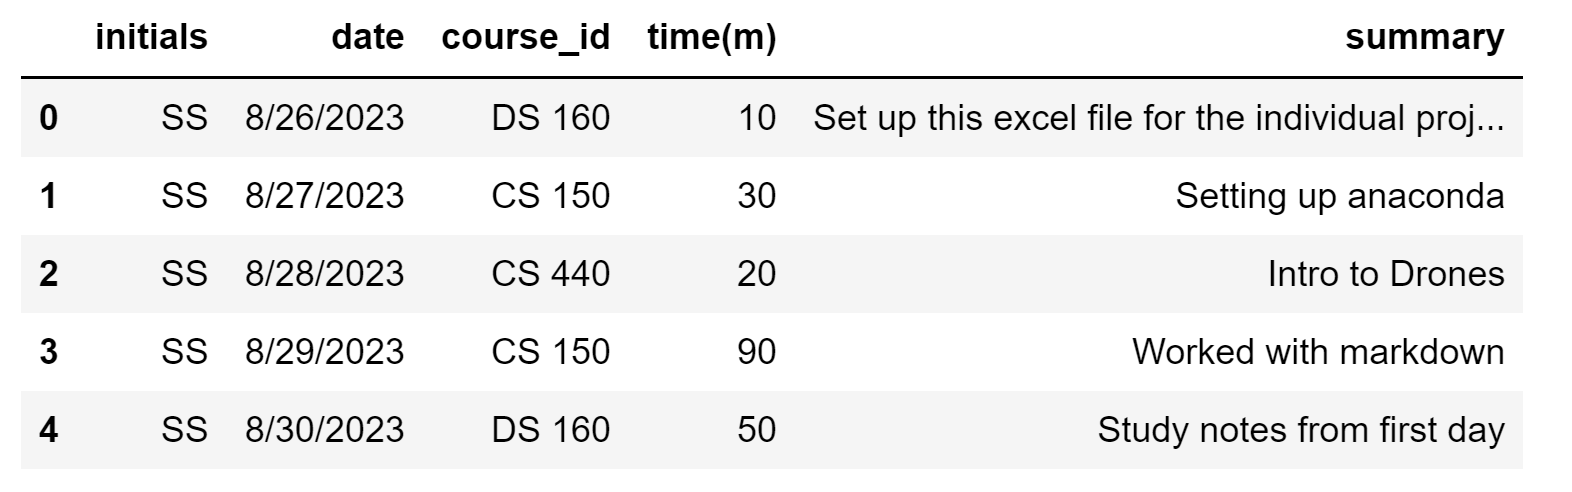

In [2]:
df = pd.read_csv('TJ_Timesheet_Project.csv')

In [3]:
df.sample(5)

,Initials,Date,Course_Id,Time_(m),Summary
2,TJ,8/29/2023,BUSA-410-01,10,Reading for class
20,TJ,9/24/2023,FINA-315-02,30,Studied
4,TJ,9/4/2023,FINA-315-02,30,Chapter 2 Reading
22,TJ,9/28/2023,BUSA-410-01,60,Worked on paper
13,TJ,9/17/2023,FINA-315-02,30,Studied


### Investigate your dataset


In [4]:
df.head(5)

,Initials,Date,Course_Id,Time_(m),Summary
0,TJ,8/28/2023,IDC-401-08,30,Reading for class
1,TJ,8/28/2023,FINA-315-02,30,Chapter 1 Reading
2,TJ,8/29/2023,BUSA-410-01,10,Reading for class
3,TJ,9/4/2023,IDC-401-08,60,Weekly reading
4,TJ,9/4/2023,FINA-315-02,30,Chapter 2 Reading


In [5]:
df.tail(5)

,Initials,Date,Course_Id,Time_(m),Summary
21,TJ,9/26/2023,FINA-315-02,30,Studied
22,TJ,9/28/2023,BUSA-410-01,60,Worked on paper
23,TJ,9/29/2023,BUSA-410-01,60,Worked on paper
24,TJ,9/30/2023,FINA-315-02,15,Studied
25,TJ,10/2/2023,IDC-401-08,30,Weekly reading


In [6]:
df.describe()

,Time_(m)
count,26.000000
mean,33.653846
std,17.581678
min,10.000000
25%,17.500000
50%,30.000000
75%,52.500000
max,60.000000


In [7]:
df.columns

Index(['Initials', 'Date', 'Course_Id', 'Time_(m)', 'Summary'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Initials   26 non-null     object
 1   Date       26 non-null     object
 2   Course_Id  26 non-null     object
 3   Time_(m)   26 non-null     int64 
 4   Summary    26 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


### Summary Statistics
Calculate basic statistics for the 'Time (minutes)' column, such as mean, median, minimum, and maximum. This will give you an overview of how time is distributed across activities. use table and graphical representations
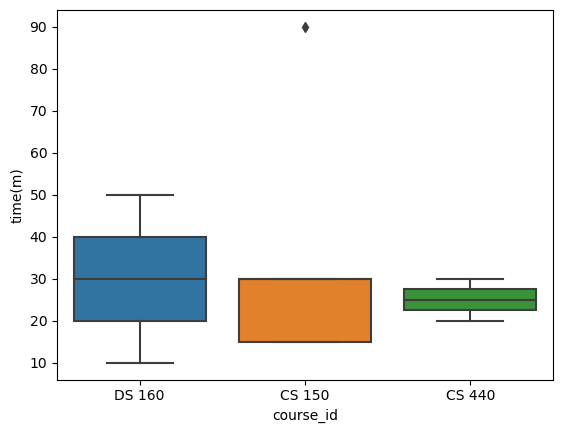

<AxesSubplot:xlabel='Course_Id', ylabel='Time_(m)'>

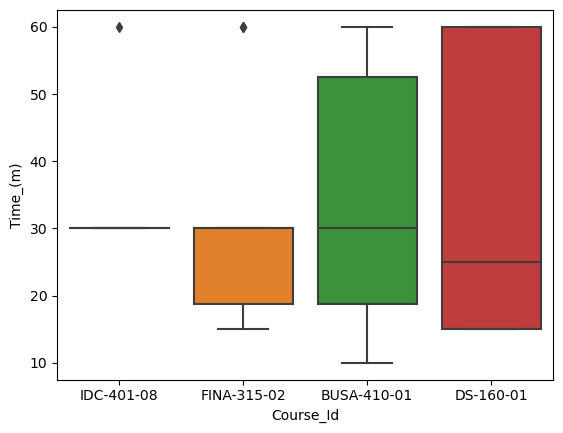

In [9]:
sns.boxplot(x ='Course_Id',
           y = 'Time_(m)',
           data = df)

### Create two new columns "day" and "day_name" using the "Date" column in which the day will represent the range of days
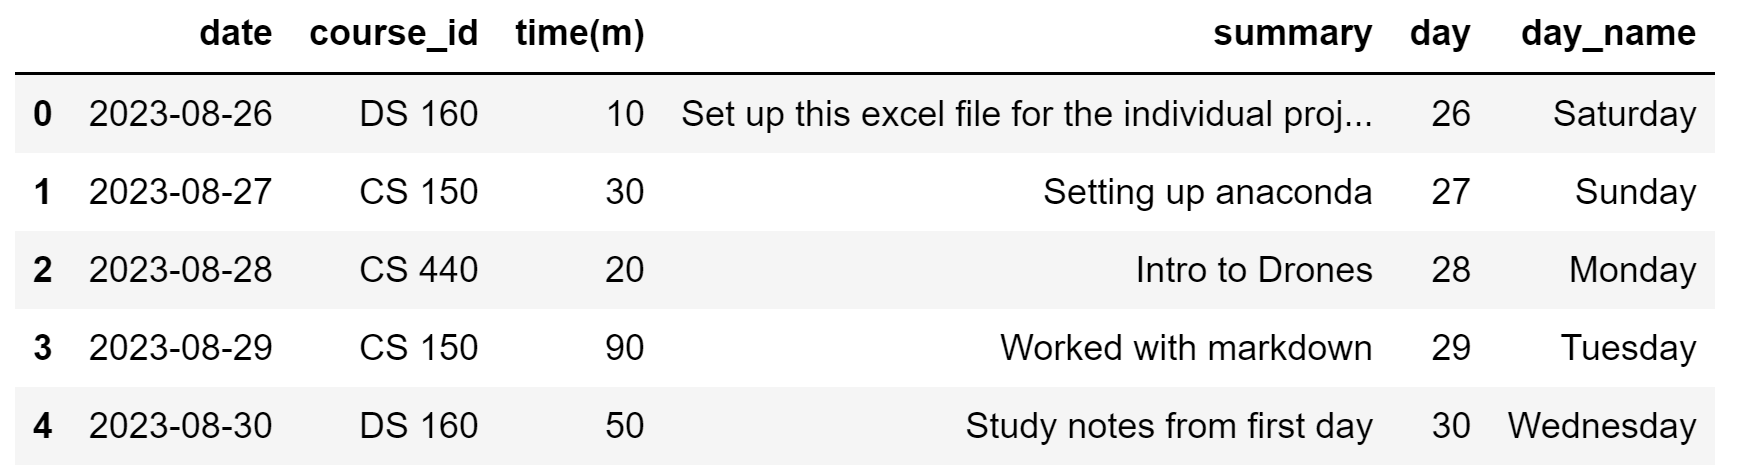

In [10]:
df['Day'] = range(1, len(df) + 1)

In [11]:
df['Day_Name'] = pd.to_datetime(df['Date'], errors = 'coerce').dt.day_name()

In [12]:
df.head(5)

,Initials,Date,Course_Id,Time_(m),Summary,Day,Day_Name
0,TJ,8/28/2023,IDC-401-08,30,Reading for class,1,Monday
1,TJ,8/28/2023,FINA-315-02,30,Chapter 1 Reading,2,Monday
2,TJ,8/29/2023,BUSA-410-01,10,Reading for class,3,Tuesday
3,TJ,9/4/2023,IDC-401-08,60,Weekly reading,4,Monday
4,TJ,9/4/2023,FINA-315-02,30,Chapter 2 Reading,5,Monday


### Data Visualization:
1. Create a histogram or bar chart to visually represent the distribution of time spent.
2. Create a  bar chart to visually represent the distribution of time spent on different courses and comment on the course you spent most and least time
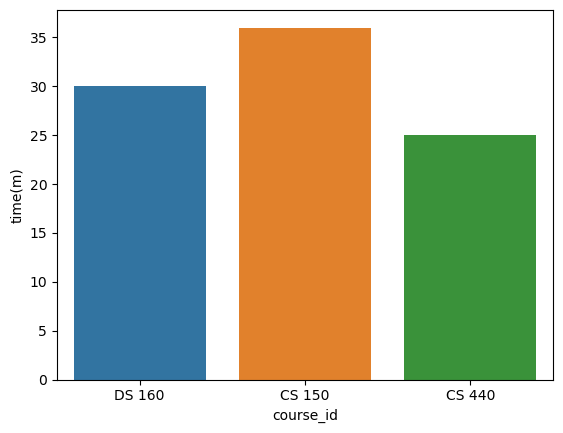

<AxesSubplot:xlabel='Time_(m)', ylabel='Count'>

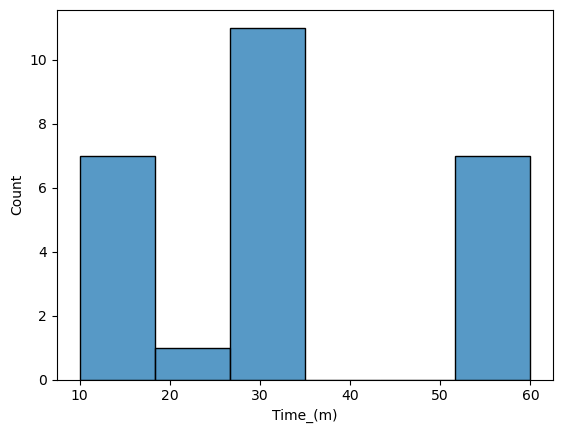

In [13]:
sns.histplot(x = 'Time_(m)',
            data = df)

<AxesSubplot:xlabel='Course_Id', ylabel='Time_(m)'>

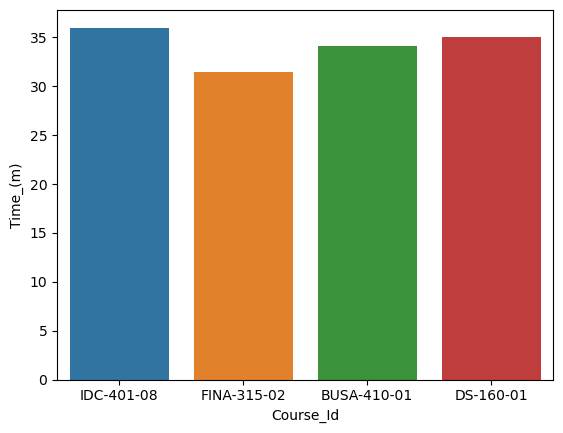

In [14]:
sns.barplot(x = 'Course_Id',
           y = 'Time_(m)',
           data = df,
           ci = False)

In [15]:
#I spent the most time on IDC-401, I spent the least amount of time on FINA

### Activity Counts:

Count the occurrences of each course in the dataset to see how often you engaged in each.

In [16]:
df['Course_Id'].value_counts()

FINA-315-02    10
BUSA-410-01     6
IDC-401-08      5
DS-160-01       5
Name: Course_Id, dtype: int64

In [17]:
#FINA-315 was the course that I engaged the most in 

### Time Trends:

Plot a line chart to visualize how time spent on activities changes over the observed days.
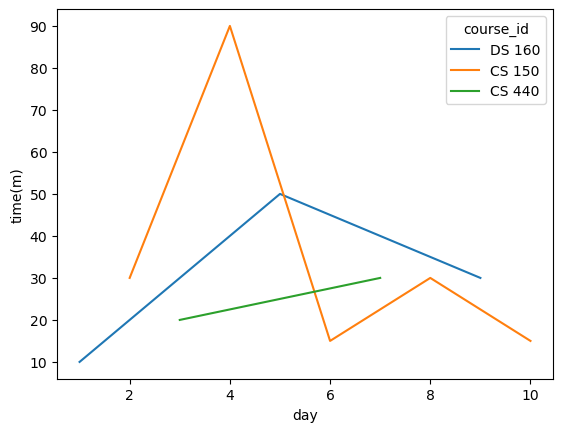

<AxesSubplot:xlabel='Day', ylabel='Time_(m)'>

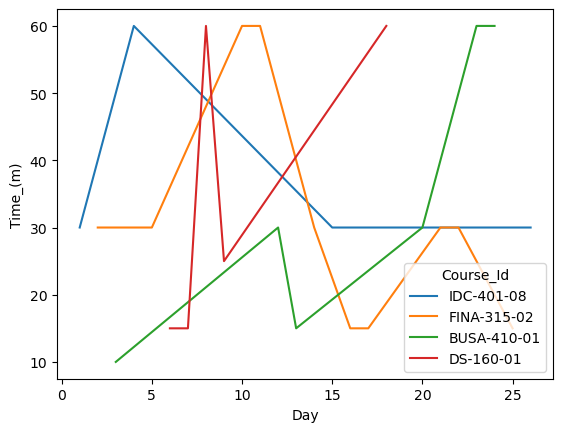

In [18]:
sns.lineplot(x = 'Day',
            y = 'Time_(m)',
            data = df,
            hue = 'Course_Id')

### Course Analysis:

For each course ex.(DS 160, CS 150, CS 440), calculate the total time spent. Which course received the most time, and which received the least?
- Sample print statement: Total time spent on CS160: 180 min

In [34]:
course_time = df.groupby("Course_Id")["Time_(m)"].sum()

In [35]:
for course_id, total_time in course_time.items():
    print(f"{course_id}: {total_time} minutes spent")

BUSA-410-01: 205 minutes spent
DS-160-01: 175 minutes spent
FINA-315-02: 315 minutes spent
IDC-401-08: 180 minutes spent


In [37]:
#DS-160 recieved the least time and FINA-315 recieved the most time

### Correlations:
- Examine whether there are any correlations between the day and the time spent. For example, do you spend more time on courses over days or less.
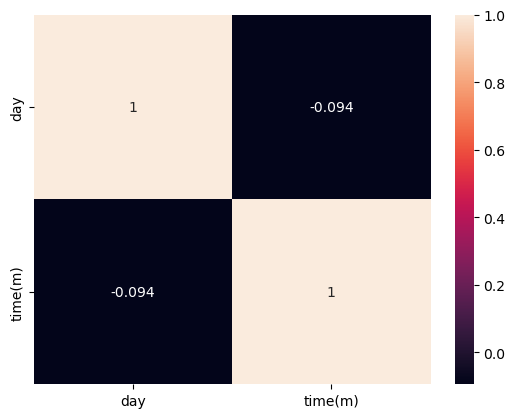

          Time_(m)       Day
Time_(m)  1.000000  0.087006
Day       0.087006  1.000000


<AxesSubplot:>

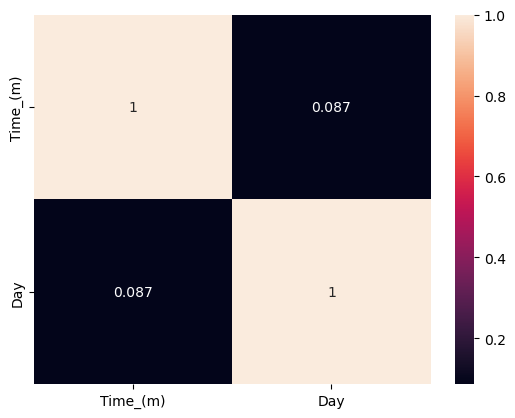

In [40]:
heat_map = df[['Time_(m)', 'Day']].corr(method='pearson')
cols = ['Time_(m)', 'Day']
print(heat_map)
sns.heatmap(heat_map, xticklabels = cols, yticklabels = cols, annot = True)

In [ ]:
#There is a very weak positive linear relationship between time and the day, 
#so one wouldn't really say that there is a relationship.